# Pymaceuticals Inc.
---

### Analysis

We investigated the effectiveness of the anti-cancer drug, Capomulin, against numerous other treatment regimens for the treatment of  squamous cell carcinoma (SCC), a commonly occurring form of skin cancer. This study involved 249 mouse models (approximately 50/50 male/female ratio)  with SCC tumors, 10 treatment regimens, including a Placebo, over the course of 45 days. The number of mice used for each drug regiment was as follows. For the Capomulin and Ramicane 230 and 228 were used respectively. For Ketapril, Naftisol, Zoniferol, Placebo, Stelasyn, Ceftamin, and Infubinol between 178 and 188 mice were employed. For the Propriva regimen, only 148 mice were used.

Over 45 days, the mean tumor volume (mm3) for Capomulin regimen was about 41 mm3 with only the Ramicane regimen showing a similar tumor volume of about 40 mm3. This suggests that Capomulin and may be as effective as  Ramican at treating SCC, of course additional studies are needed for further verification. The other drug regimes, including the Placebo, exhibited tumor volumes of between 52 and 55 mm3 likely indicating these drugs were ineffective at treating SCC. Looking at the final tumor volume of a subset of the regimen drugs which included Capomulin, Ramicane, Infubinol and Ceftamin at the 45 day mark more clearly shows the difference in treatment  effectiveness of the first two versus latter two drugs. This data is summarized in the attached box-plot that shows Capomulin and Ramicane have almost identical mean tumor volumes of 36 mm3, while the other two drugs have mean tumor volumes of approximately 58 mm3. However, it should be noted that the Infubinol data has a single outlier with a tumor volume value of 36 mm3.

In order to see how the Camuline regime affected the tumor volume over the 45 day study, the data for a single mouse (mouse ID: l509) was plotted over time. The plot shows that there is in fact a decrease in tumor volume at the 45 day mark (~42 mm3) compared to the starting volume (45 mm3). Additionally, a plot of mouse weight (g) vs tumor volume (mm3) was created and it shows a linear correlation (correlation of coefficient value of 0.84) between the two parameters. The heavier the mouse, the larger the average tumor volume and vice versa. However, at this point we cannot say that bigger mice weight is causing larger tumor volumes.  Correlation does not always equal causation, and other factors (i.e. age, diet, etc) need to be considered to reach any conclusion.



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as st
from scipy import stats

# set plotting theme using seaborn
sns.set()

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame using the default inner join
combined_results_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
combined_results_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# display the info for the dataframe
combined_results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 118.4+ KB


In [3]:
# Checking the number of mice.
combined_results_df["Mouse ID"].nunique()

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_df = combined_results_df[combined_results_df.duplicated(["Mouse ID", "Timepoint"], keep=False)]
duplicate_df["Mouse ID"].unique()

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
final_df = combined_results_df.loc[combined_results_df["Mouse ID"] != "g989", : ].reset_index()

In [7]:
# Checking the number of mice in the clean DataFrame.
final_df["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
drug_regimen_df = final_df.groupby("Drug Regimen")

tumor_vol_df = pd.DataFrame({
    "Mean Tumor Volume": drug_regimen_df["Tumor Volume (mm3)"].mean(),
    "Median Tumor Volume": drug_regimen_df["Tumor Volume (mm3)"].median(),
    "Tumor Volume Variance": drug_regimen_df["Tumor Volume (mm3)"].var(),
    "Tumor Volume Std. Dev.": drug_regimen_df["Tumor Volume (mm3)"].std(),
    "Tumor Volume Std. Err.": drug_regimen_df["Tumor Volume (mm3)"].sem()
})

tumor_vol_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
final_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

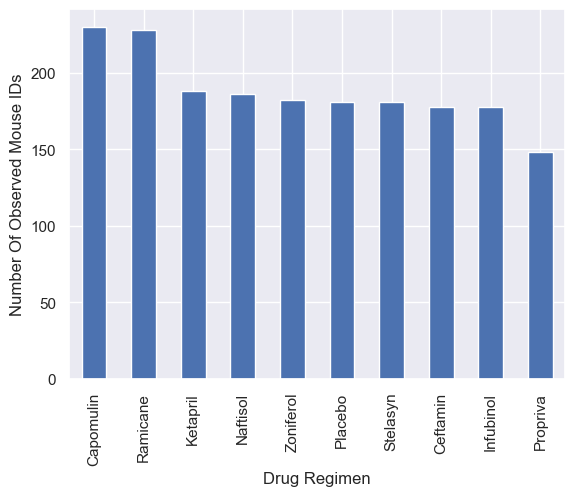

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_df["Mouse ID"].count().sort_values(ascending=False).plot.bar(ylabel="Number Of Observed Mouse IDs");

In [11]:
drug_regimen_df["Mouse ID"].count().sort_values(ascending=False)

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Mouse ID, dtype: int64

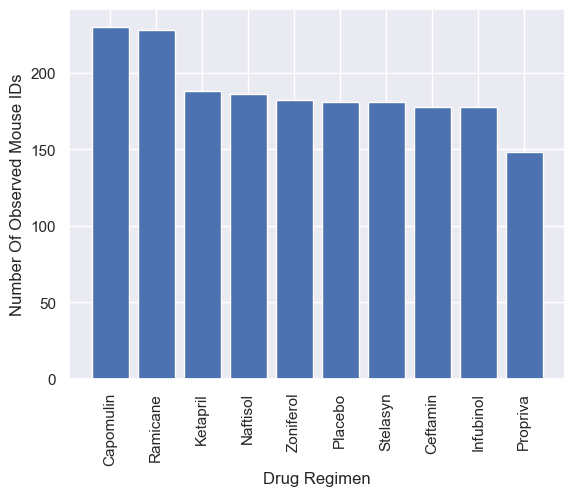

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
obs_series = drug_regimen_df["Mouse ID"].count().sort_values(ascending=False)
obs_count = obs_series.to_list()

x_axis = list(range(len(obs_count)))
tick_locations = x_axis
tick_labels = obs_series.index.tolist()

# do the bar plot now
plt.bar(x_axis, obs_count, align="center")
plt.xticks(tick_locations, tick_labels, rotation=90);
plt.xlabel("Drug Regimen")
plt.ylabel("Number Of Observed Mouse IDs");

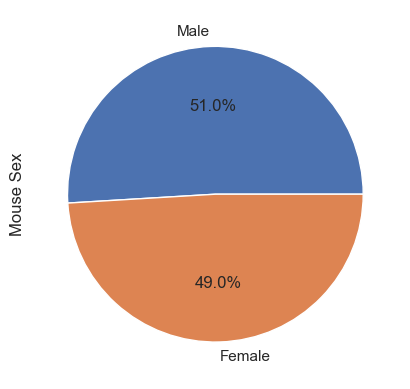

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
final_df["Sex"].value_counts().plot.pie(autopct='%1.1f%%', ylabel="Mouse Sex");

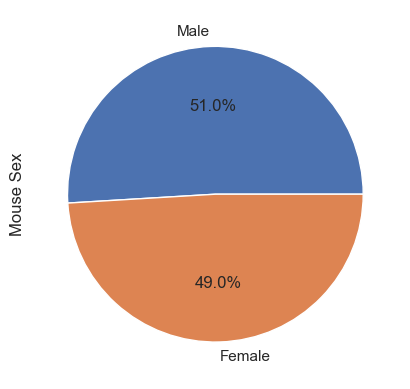

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = final_df["Sex"].value_counts().to_list()
gender_labels = ["Male", "Female"]

plt.pie(gender_counts, labels=gender_labels, autopct="%1.1f%%")
plt.ylabel("Mouse Sex");

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# filter the final dataframe for the 4 regimen below
drug_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
regimen_df = final_df.loc[final_df["Drug Regimen"].isin(drug_regimen)]

# Start by getting the last (greatest) timepoint for each mouse
mouse_df = regimen_df.groupby("Mouse ID")
max_timepoint = mouse_df["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_vol_df = pd.merge(final_df, max_timepoint, on=["Mouse ID","Timepoint"])
tumor_vol_df

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,9,k403,Ramicane,Male,21,16,45,22.050126,1
1,19,s185,Capomulin,Female,3,17,45,23.343598,1
2,29,x401,Capomulin,Female,16,15,45,28.484033,0
3,39,m601,Capomulin,Male,22,17,45,28.430964,1
4,49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...,...
95,1797,x822,Ceftamin,Male,3,29,45,61.386660,3
96,1813,y163,Infubinol,Female,17,27,45,67.685569,3
97,1845,y769,Ceftamin,Female,6,27,45,68.594745,4
98,1855,y865,Ceftamin,Male,23,26,45,64.729837,3


In [16]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)
regimen_dict = dict()

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in drug_regimen:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_tumor_vol = tumor_vol_df.loc[tumor_vol_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]

    # store the vol data into dictionary for plotting below
    regimen_dict[drug] = drug_tumor_vol.to_list()

    # Determine outliers using upper and lower bounds
    quartiles = drug_tumor_vol.quantile([.25, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # get the potential outliers
    outliers = drug_tumor_vol[(drug_tumor_vol < lower_bound) | (drug_tumor_vol > upper_bound)]
    if outliers.empty:
        print(drug + "'s potential outliers: NONE\n")
    else:
        outlier_mouse = tumor_vol_df.iloc[outliers.index.values, [1, 7]]
        print(drug + "'s potential outliers:\n", outlier_mouse, "\n")


Capomulin's potential outliers: NONE

Ramicane's potential outliers: NONE

Infubinol's potential outliers:
    Mouse ID  Tumor Volume (mm3)
58     c326           36.321346 

Ceftamin's potential outliers: NONE



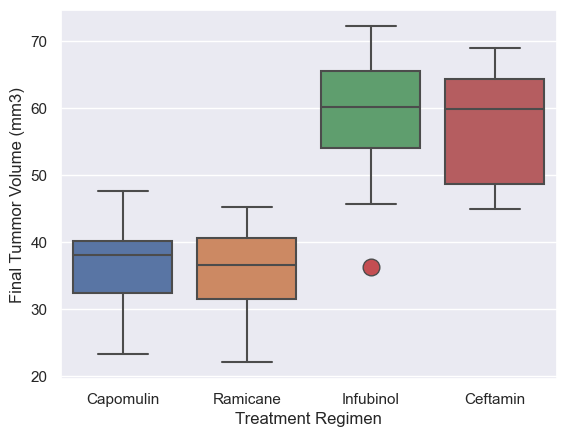

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# make a dataframe from the dictionary above to allow creation of a boxplot easier using seaborn
df = pd.DataFrame(regimen_dict)
ax1 = sns.boxplot(data=df, flierprops={"marker": "o", "markerfacecolor":'r', "markersize":12})
ax1.set(xlabel='Treatment Regimen', ylabel='Final Tummor Volume (mm3)');

In [18]:
df[drug_regimen].min()

Capomulin    23.343598
Ramicane     22.050126
Infubinol    36.321346
Ceftamin     45.000000
dtype: float64

## Line and Scatter Plots

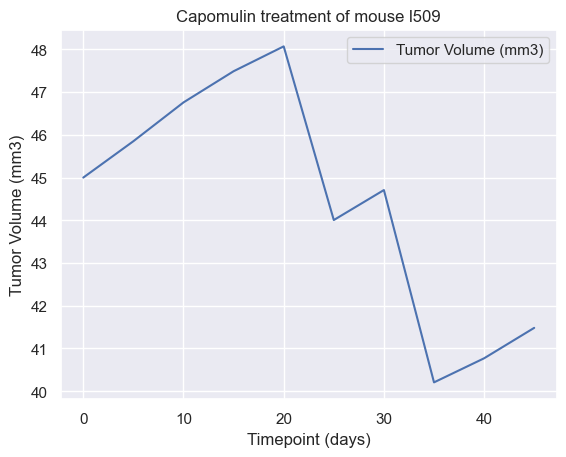

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

#filter to get the specific mouse
mouse_id = "l509"
mouse_df = final_df.loc[final_df["Mouse ID"] == mouse_id]
treatment = mouse_df.iloc[0,2]

mouse_df.plot.line(x="Timepoint", y="Tumor Volume (mm3)", 
                   title=treatment + " treatment of mouse " + mouse_id, 
                   xlabel="Timepoint (days)", ylabel="Tumor Volume (mm3)");

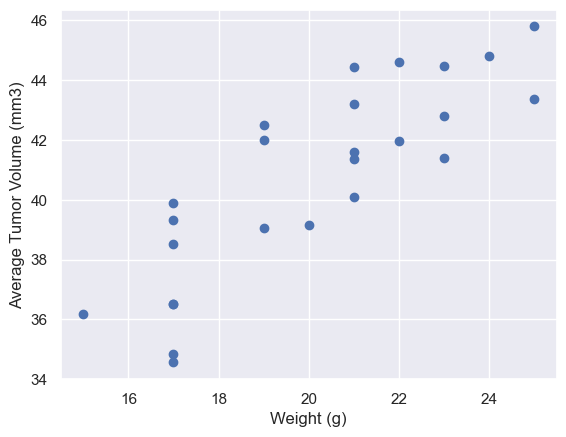

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# filter out only rows for Capomulin regimen
df = final_df.loc[final_df["Drug Regimen"] == "Capomulin", ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]

# group by mouse id and get weight value and 
mw_group = df.groupby(["Mouse ID"]).mean()

# set the x and y values
x_values = mw_group["Weight (g)"].tolist()
y_values = mw_group["Tumor Volume (mm3)"].tolist()

plt.scatter(x_values, y_values)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)");

## Correlation and Regression

The correlation coefficient between mouse weight and tumor volume is 0.84

The r-squared is: 0.7088568047708723


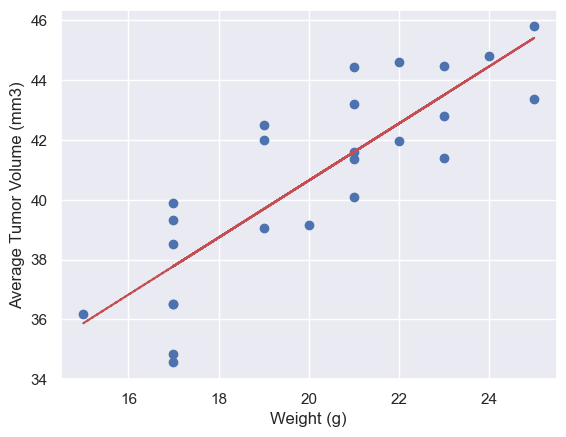

In [21]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
cc = round(st.pearsonr(x_values, y_values)[0],2)
print(f"The correlation coefficient between mouse weight and tumor volume is {cc}\n")

# lets do a linear regression and plot the best fit line
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
regress_values = [x * slope + intercept for x in x_values]
print(f"The r-squared is: {rvalue**2}")
    
# do a scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r--")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)");